# <center> <h1>    🌇   🧑‍💻   🌃

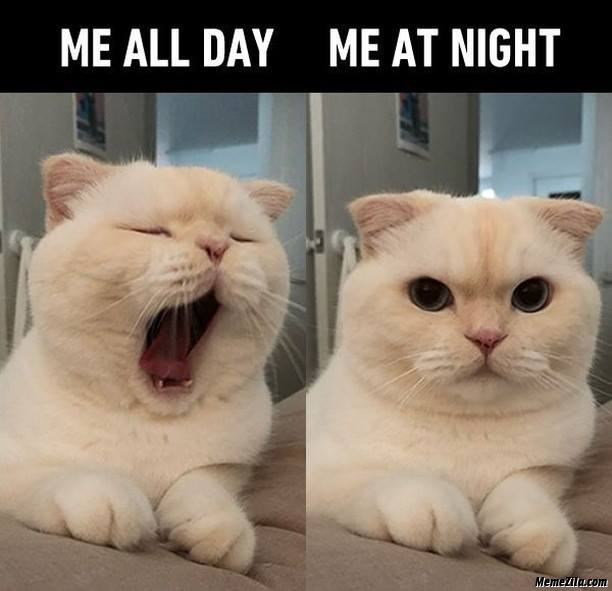

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

# <center> Show the folder where the train and test data are located

In [2]:
train_data_dir = "Photo/day_night/training"
test_data_dir="Photo/day_night/test"

# We'll first create a function that reads the data set
## We can read images in HSV format and use only the V - Value (light) channel.
## Because we distinguish between day and night depending on the light. V is higher in daytime images and lower in evening images

In [3]:
def load_dataset(path):
    
    images = []
    
    classes = ["day","night"]
    
    for i in classes:
        for j in glob.glob(os.path.join(path,i,'*')):
            img = cv2.imread(j)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)  #[1]
            img = img[:,:,2] #[2]
            
            images.append((img,i))
            
    return images

In [4]:
train_data = load_dataset(train_data_dir)
test_data = load_dataset(test_data_dir)

In [5]:
train_data     # show trains

[(array([[218, 218, 218, ..., 228, 229, 229],
         [218, 218, 218, ..., 232, 232, 232],
         [218, 218, 218, ..., 229, 229, 229],
         ...,
         [ 43,  46,  47, ...,  75,  75,  75],
         [ 44,  46,  47, ...,  78,  78,  75],
         [ 44,  46,  47, ...,  78,  78,  75]], dtype=uint8),
  'day'),
 (array([[231, 234, 233, ..., 240, 241, 241],
         [231, 234, 233, ..., 244, 244, 244],
         [231, 233, 233, ..., 241, 241, 241],
         ...,
         [ 79,  71,  93, ...,  90,  90,  90],
         [ 74,  81,  83, ...,  93,  93,  90],
         [ 73,  81,  83, ...,  93,  93,  90]], dtype=uint8),
  'day'),
 (array([[204, 203, 201, ..., 182, 176, 224],
         [203, 203, 201, ..., 182, 176, 224],
         [203, 202, 202, ..., 182, 176, 224],
         ...,
         [ 63,  63,  64, ...,  29,  29,  29],
         [ 63,  63,  63, ...,  28,  28,  29],
         [ 78,  78,  78, ...,  29,  29,  29]], dtype=uint8),
  'day'),
 (array([[236, 236, 236, ..., 240, 241, 241],
         

In [6]:
train_data[0]

(array([[218, 218, 218, ..., 228, 229, 229],
        [218, 218, 218, ..., 232, 232, 232],
        [218, 218, 218, ..., 229, 229, 229],
        ...,
        [ 43,  46,  47, ...,  75,  75,  75],
        [ 44,  46,  47, ...,  78,  78,  75],
        [ 44,  46,  47, ...,  78,  78,  75]], dtype=uint8),
 'day')

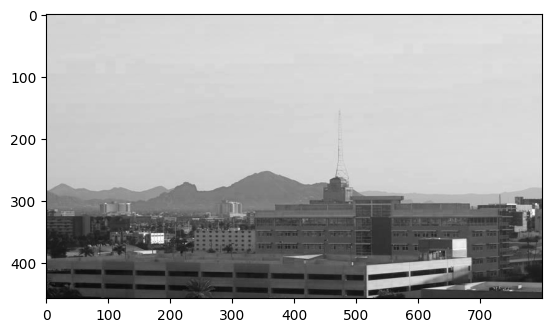

In [7]:
plt.imshow(train_data[0][0],cmap='gray')

In [8]:
len(train_data)

240

In [9]:
len(test_data)

160

# We combine our train and test data. 
## Why ? 
## To bring all images to the same size. After that, we will divide the data into training and testing.

In [10]:
train_data.extend(test_data)

In [11]:
len(train_data)

400

## Show data
As you can see we have different sizes of images, we need to bring them to the same size

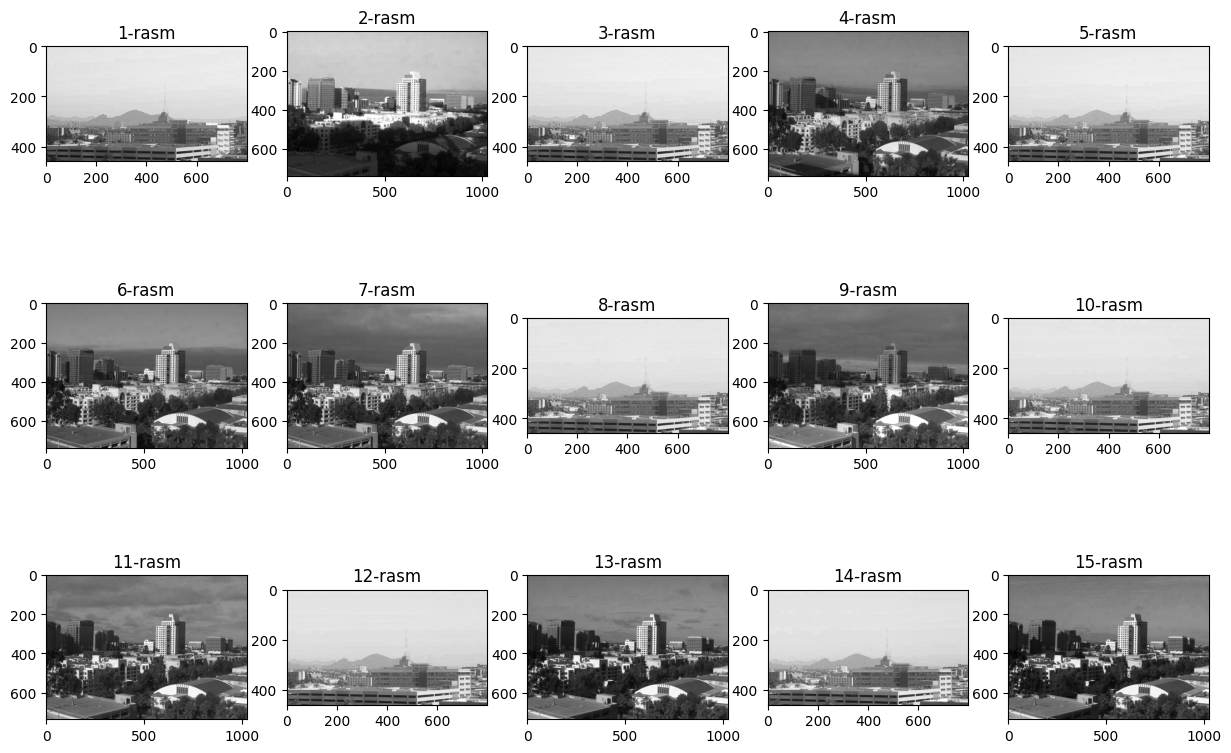

In [12]:
plt.figure(figsize=(15,10))

for i in range(1,16):
    plt.subplot(3,5,i)
    plt.title(f"{i}-rasm")
    plt.imshow(train_data[i][0],cmap='gray')
    
plt.show()

### 1 - step. We can find the dimensions of the x axis

In [13]:
x_size = [train_data[i][0].shape[0] for i in range(len(train_data))]
x_size

[458,
 458,
 737,
 458,
 737,
 458,
 737,
 737,
 458,
 737,
 458,
 737,
 458,
 737,
 458,
 737,
 458,
 458,
 737,
 458,
 737,
 458,
 737,
 458,
 737,
 458,
 737,
 458,
 737,
 737,
 372,
 469,
 591,
 469,
 593,
 372,
 469,
 469,
 593,
 700,
 372,
 700,
 469,
 700,
 700,
 700,
 469,
 700,
 593,
 372,
 700,
 469,
 700,
 700,
 700,
 593,
 700,
 372,
 700,
 469,
 700,
 700,
 700,
 469,
 700,
 372,
 469,
 372,
 469,
 471,
 372,
 469,
 471,
 591,
 469,
 471,
 591,
 469,
 471,
 591,
 469,
 471,
 591,
 469,
 889,
 469,
 889,
 469,
 889,
 469,
 889,
 469,
 889,
 469,
 889,
 555,
 889,
 555,
 889,
 555,
 372,
 889,
 555,
 555,
 555,
 531,
 439,
 439,
 439,
 439,
 439,
 439,
 614,
 372,
 471,
 471,
 471,
 471,
 471,
 471,
 737,
 737,
 737,
 737,
 737,
 737,
 737,
 737,
 737,
 737,
 737,
 372,
 372,
 372,
 591,
 372,
 469,
 591,
 458,
 469,
 614,
 591,
 458,
 469,
 614,
 591,
 458,
 469,
 614,
 458,
 469,
 614,
 458,
 614,
 458,
 458,
 458,
 458,
 458,
 737,
 458,
 737,
 458,
 737,
 458,
 458,
 531

### 2 - step. We can find the dimensions of the y axis

In [14]:
y_size = [train_data[i][0].shape[1] for i in range(len(train_data))]
y_size

[800,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 1024,
 640,
 640,
 800,
 640,
 800,
 640,
 640,
 640,
 800,
 1280,
 640,
 1280,
 640,
 1280,
 1280,
 1280,
 640,
 1280,
 800,
 640,
 1280,
 640,
 1280,
 1280,
 1280,
 800,
 1280,
 640,
 1280,
 640,
 1280,
 1280,
 1280,
 640,
 1280,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 800,
 640,
 640,
 800,
 640,
 640,
 800,
 640,
 640,
 800,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 800,
 1280,
 800,
 1280,
 800,
 640,
 1280,
 800,
 800,
 800,
 800,
 640,
 640,
 640,
 640,
 640,
 640,
 857,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 640,
 640,
 640,
 800,
 640,
 640,
 800,
 800,
 640,
 857,
 800,
 800,
 640,
 857,
 800,
 800,
 640,
 857,
 800,
 640,
 857,
 800,
 857,
 800,
 800,
 800,
 800,
 

### 3 - step. We find the average of the x-axis values

In [15]:
x_mean = np.mean(x_size)
x_mean

568.1525

### 4 - step. We find the average of the y-axis values

In [16]:
y_mean = np.mean(y_size)
y_mean

856.0675

#### We calculated the average of the x and y values, now we need to scale the image to this dimension (860, 570)


### 5 - step. Function to bring images to the same size

In [17]:
def one_size(rasmlar):
    
    size_rasmlar=[]
    
    for i in rasmlar:
        rasm=cv2.resize(i[0],(860,570))
        size_rasmlar.append((rasm,i[1]))
        
    return size_rasmlar

In [18]:
train_data = one_size(train_data)

In [19]:
train_data 

[(array([[218, 218, 218, ..., 228, 229, 229],
         [218, 218, 218, ..., 231, 231, 231],
         [218, 218, 218, ..., 230, 230, 230],
         ...,
         [ 43,  45,  47, ...,  76,  76,  75],
         [ 44,  46,  47, ...,  78,  78,  75],
         [ 44,  46,  47, ...,  78,  78,  75]], dtype=uint8),
  'day'),
 (array([[231, 233, 233, ..., 240, 241, 241],
         [231, 234, 233, ..., 243, 243, 243],
         [231, 233, 233, ..., 242, 242, 242],
         ...,
         [ 76,  76,  86, ...,  91,  91,  90],
         [ 74,  80,  83, ...,  93,  93,  90],
         [ 73,  80,  83, ...,  93,  93,  90]], dtype=uint8),
  'day'),
 (array([[204, 202, 200, ..., 185, 178, 219],
         [203, 202, 201, ..., 185, 178, 219],
         [202, 202, 202, ..., 185, 178, 219],
         ...,
         [ 63,  64,  64, ...,  28,  30,  30],
         [ 63,  63,  64, ...,  28,  28,  29],
         [ 76,  76,  76, ...,  28,  29,  29]], dtype=uint8),
  'day'),
 (array([[236, 236, 236, ..., 240, 241, 241],
         

#### As you can see in the dataset, there are two classes, we need to change them to 1(day) and 0(night)

### 6- step. The function of transferring classes to 1 and 0

In [20]:
def encode(images):
    
    target_images = []
    
    for i in images:
        if i[1]=="day":
            target_images.append((i[0],1))
        else:
            target_images.append((i[0],0))
            
    return target_images

In [21]:
train_data=encode(train_data)
train_data

[(array([[218, 218, 218, ..., 228, 229, 229],
         [218, 218, 218, ..., 231, 231, 231],
         [218, 218, 218, ..., 230, 230, 230],
         ...,
         [ 43,  45,  47, ...,  76,  76,  75],
         [ 44,  46,  47, ...,  78,  78,  75],
         [ 44,  46,  47, ...,  78,  78,  75]], dtype=uint8),
  1),
 (array([[231, 233, 233, ..., 240, 241, 241],
         [231, 234, 233, ..., 243, 243, 243],
         [231, 233, 233, ..., 242, 242, 242],
         ...,
         [ 76,  76,  86, ...,  91,  91,  90],
         [ 74,  80,  83, ...,  93,  93,  90],
         [ 73,  80,  83, ...,  93,  93,  90]], dtype=uint8),
  1),
 (array([[204, 202, 200, ..., 185, 178, 219],
         [203, 202, 201, ..., 185, 178, 219],
         [202, 202, 202, ..., 185, 178, 219],
         ...,
         [ 63,  64,  64, ...,  28,  30,  30],
         [ 63,  63,  64, ...,  28,  28,  29],
         [ 76,  76,  76, ...,  28,  29,  29]], dtype=uint8),
  1),
 (array([[236, 236, 236, ..., 240, 241, 241],
         [237, 237, 2

*` Very good. Our data sets are the same size `*

In [22]:
for i in train_data:
    print(i[0].shape)

(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)
(570, 860)

*` Classes `*

In [23]:
for i in train_data:
    print(i[1],end=' ')

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#### View 15 images of the same size

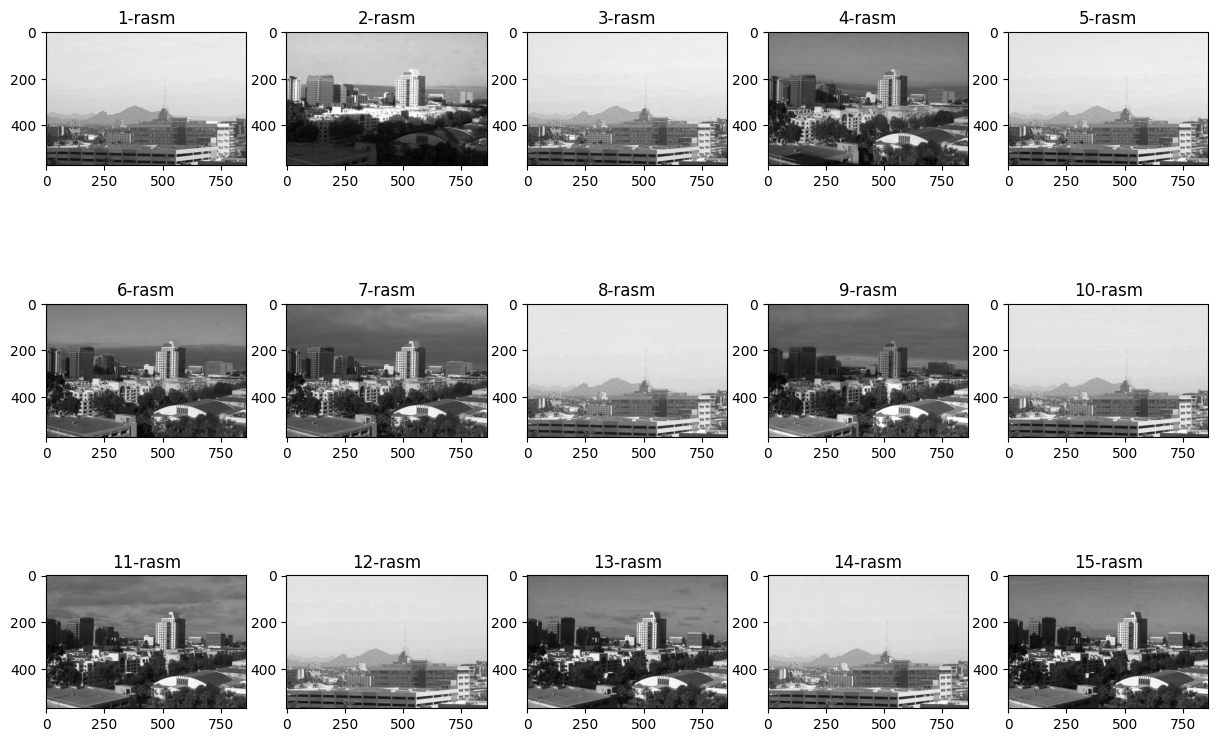

In [24]:
plt.figure(figsize=(15,10))

for i in range(1,16):
    plt.subplot(3,5,i)
    plt.title(f"{i}-rasm")
    plt.imshow(train_data[i][0],cmap='gray')
    
plt.show()

### 7 - step. We divide the dataset by 2 (train, test)

In [25]:
def dataset_split(images, nisbat=0.2):
    train=[]
    test=[]
    
    for i in range(int(len(images)*(1-nisbat))):
        train.append(images[i])
        
    for i in range(int(len(images)*(1-nisbat)), len(images)):
        test.append(images[i])
        
    return train, test

In [26]:
train, test = dataset_split(train_data,nisbat=0.4)

# Train

### 8 - step. We calculate the sum of all images in the train

In [27]:
train_sum=np.array([np.sum(i[0]) for i in train])
train_sum

array([85833927, 94567485, 64778969, 97919921, 53904521, 98053349,
       54977125, 50648708, 97109922, 51100725, 96794313, 51724715,
       95641273, 53152609, 95812718, 52773256, 96483235, 93762078,
       54733365, 89088033, 54069542, 92015430, 53454103, 92302633,
       54048893, 92959852, 52630909, 93893879, 51770541, 50675773,
       71345972, 80309609, 78557010, 60598732, 77463417, 74675576,
       77150969, 51013178, 76142803, 63652187, 68066713, 63567679,
       73251888, 63599356, 63356434, 62779765, 54538678, 62724756,
       75512702, 69123042, 61688947, 76070420, 62123645, 62751891,
       63401196, 80668983, 62955877, 70435346, 64601369, 72940842,
       64215651, 63503825, 62668617, 53489392, 63053228, 67697146,
       52358188, 67075117, 55030762, 75596333, 62309335, 48035444,
       76982439, 70064858, 46352861, 77817437, 70630244, 52291281,
       78060413, 69872478, 53965752, 78337114, 50048370, 56391368,
       65376855, 58943843, 67137167, 57000776, 64170204, 55371

### 9 - step. We get the sum of daytime pictures

In [28]:
train_sum_day=np.array([np.sum(i[0]) for i in train if i[1]==1])
train_sum_day

array([85833927, 94567485, 64778969, 97919921, 53904521, 98053349,
       54977125, 50648708, 97109922, 51100725, 96794313, 51724715,
       95641273, 53152609, 95812718, 52773256, 96483235, 93762078,
       54733365, 89088033, 54069542, 92015430, 53454103, 92302633,
       54048893, 92959852, 52630909, 93893879, 51770541, 50675773,
       71345972, 80309609, 78557010, 60598732, 77463417, 74675576,
       77150969, 51013178, 76142803, 63652187, 68066713, 63567679,
       73251888, 63599356, 63356434, 62779765, 54538678, 62724756,
       75512702, 69123042, 61688947, 76070420, 62123645, 62751891,
       63401196, 80668983, 62955877, 70435346, 64601369, 72940842,
       64215651, 63503825, 62668617, 53489392, 63053228, 67697146,
       52358188, 67075117, 55030762, 75596333, 62309335, 48035444,
       76982439, 70064858, 46352861, 77817437, 70630244, 52291281,
       78060413, 69872478, 53965752, 78337114, 50048370, 56391368,
       65376855, 58943843, 67137167, 57000776, 64170204, 55371

### 10 - step. we get the sum of night pictures

In [29]:
train_sum_night=np.array([np.sum(i[0]) for i in train if i[1]==0])
train_sum_night

array([16548706, 16181314, 14937604, 14422354, 12778936, 12575448,
       12564939, 12615169, 12652757, 12588816, 13640318, 23175431,
       23743307, 23686511, 12679865, 23878639,  4017986, 13571369,
       58625919,  4138732,  6759416, 12607686, 54091021,  4074004,
        6741521, 12634857, 53662561,  3979683,  7060005, 53422131,
        6505092,  7126112, 55507597,  6850859, 56033943, 55320160,
       56312847, 56240492, 55389746, 13678545, 56067469, 14247855,
       55714637, 13208761, 54649405, 53981947, 35131915, 53651672,
       10368637, 35403662, 53808355, 12372958, 35300715, 53183103,
       12014122, 35953951, 11929345, 35579075, 12124703, 11229749,
       17629728, 48675398, 17730395, 48413491, 48516114, 50178294,
       48386413, 48664570, 48563852, 48692597, 17258187, 48647175,
       48517537, 49785468, 48565721, 48547670, 48611625, 48777535,
       19271474, 48831243, 48927716, 50367172, 48590965, 48720796,
       48381410, 18409029, 47484515, 43344377, 46611754, 47505

## View min, max, mean info   📊

In [30]:
day_info = {
    "Day min" : train_sum_day.min(),
    "Day mean" : np.around(train_sum_day.mean(),1),
    "Day max" : train_sum_day.max()
}

In [31]:
night_info = {
    "Night min" : train_sum_night.min(),
    "Night mean" : np.around(train_sum_night.mean(),1),
    "Night max" : train_sum_night.max()
}

<BarContainer object of 6 artists>

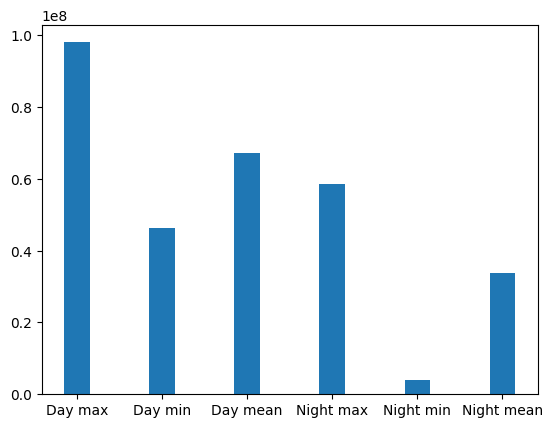

In [32]:
x=["Day max","Day min","Day mean","Night max", "Night min","Night mean"]
y=[day_info["Day max"],day_info["Day min"],day_info["Day mean"],night_info["Night max"],night_info["Night min"],night_info["Night mean"]]

plt.bar(x,y,width=0.3)

## The difference between the average value of day and night is big. We have to fix it

In [33]:
# difference of mean values
difference = day_info["Day mean"] - night_info["Night mean"]
difference

33415034.6

In [34]:
# we get half the difference
difference_half = difference /2
difference_half

16707517.3

In [35]:
# we add half of the difference to the middle of the night
night_difference = night_info["Night mean"]+difference_half
night_difference

50617998.7

In [36]:
# we get the size of the picture
img_size = train[0][0].shape[0] * train[0][0].shape[1]
img_size

490200

In [37]:
#our average value that separates day and night. 
#That is, if the average value of the sum of the received images is higher than the line value, 
#this image is day, otherwise it is night
line = night_difference/img_size
line

103.25989126886985

# Test

### 1 - step.  We load our test images and its classes into the images variable

In [38]:
images=[]
for i in test:
   
    images.append((np.mean(i[0]),i[1]))
images

[(194.2330905752754, 1),
 (157.8387066503468, 1),
 (201.61447776417788, 1),
 (191.24802325581396, 1),
 (188.1261485108119, 1),
 (185.92445940432478, 1),
 (183.72277029783763, 1),
 (184.67034271725825, 1),
 (161.99237862097104, 1),
 (157.66262137902896, 1),
 (124.35329457364341, 1),
 (125.66196450428397, 1),
 (129.3524133006936, 1),
 (129.38956548347613, 1),
 (158.89213994288045, 1),
 (127.45748878008976, 1),
 (150.34384128926968, 1),
 (157.19449816401468, 1),
 (117.27739902080783, 1),
 (152.01529579763363, 1),
 (150.84298245614036, 1),
 (149.976160750714, 1),
 (133.87498776009792, 1),
 (128.16552427580578, 1),
 (128.15252753977967, 1),
 (125.6853590371277, 1),
 (149.18820889432885, 1),
 (104.14261525907793, 1),
 (153.8951958384333, 1),
 (98.87552835577316, 1),
 (150.28011015911872, 1),
 (153.5468074255406, 1),
 (123.29335577315382, 1),
 (151.13012647898816, 1),
 (126.73181150550796, 1),
 (141.65462464300285, 1),
 (132.53158302733578, 1),
 (159.31968380252957, 1),
 (156.93802529579764, 

### 2 - step. Testing function

In [39]:
def testing(rasmlar):
    s=0
    
    for i in rasmlar:
        if line < i[0]:
            target=1
        else:
            target=0
            
        if target != i[1]:
            s+=1
            
    return s

## We found 12 images with errors during testing

In [40]:
lost=testing(images)
lost

12

## We classified 92.5% correctly

In [41]:
accuracy=100-(lost/len(images))*100
accuracy

92.5

# <center> <h1> 👨‍💻   🚀  